# Notebook for the project in *TDT4259 - Applied Data Science*

Necessary imports

In [35]:
import sys
import os
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import tikzplotlib
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
sys.path.append(".")

from util.dataset_manipulation import get_and_process_df

FIG_PATH = Path.cwd().joinpath("figures")

We start by preprocessing the columns to be on a concise format.

In [2]:
dataset = get_and_process_df("train_data.csv")
desc_dataset = get_and_process_df("train_data.csv", False)

## Creating some descriptive statistics

In [3]:
attrition_pr_city = desc_dataset.groupby("City")["Attrition"].count()

In [60]:
attrition_0 = desc_dataset.groupby('City')['Attrition'].apply(lambda x: (x==0).sum()).reset_index(name='attr = 0')
attrition_1 = desc_dataset.groupby('City')['Attrition'].apply(lambda x: (x==1).sum()).reset_index(name='attr_1')

combined = attrition_0.copy()
combined["attr = 1"] = attrition_1.attr_1

In [70]:
combined = combined.set_index(pd.Index(combined.City))

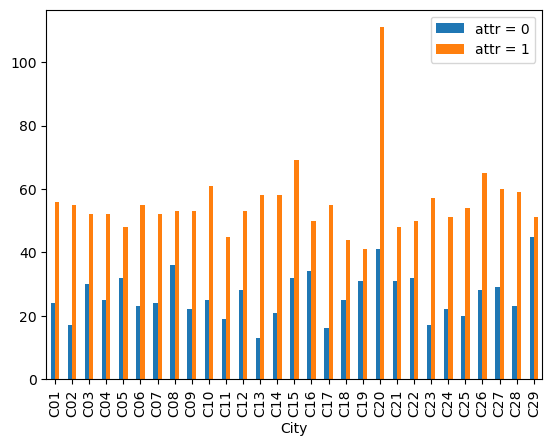

In [73]:
combined.plot(kind="bar")

tikzplotlib.save(FIG_PATH.joinpath("test.tex"))

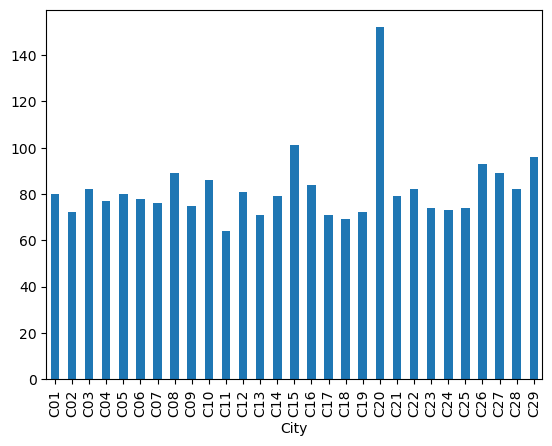

In [36]:
# attrition_pr_city.plot(kind = "bar")

plt.title = "test"
tikzplotlib.save(FIG_PATH.joinpath("test.tex"))

# Prototyping some classifications

In [4]:
from sklearn.model_selection import train_test_split

In [25]:
X = dataset.drop(columns = ["Date", 
                            "Attrition", 
                            "Emp_ID", 
                            "Date_Of_Joining", 
                            "Last_Working_Date", 
                            "Joining_Designation", 
                            "Designation",
                            "Total_Business_Value",
                            "Work_Duration",
                            "Salary"])
y = dataset["Attrition"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 4259)

In [27]:
from sklearn.svm import SVC

In [28]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [29]:
from sklearn.metrics import accuracy_score


y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7735849056603774

In [30]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.33      0.49       153
           1       0.76      0.98      0.85       324

    accuracy                           0.77       477
   macro avg       0.83      0.66      0.67       477
weighted avg       0.80      0.77      0.74       477

